In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("preprocessed_df.csv", encoding = "ISO-8859-1")
df.head()


article  \
0  ['musician', 'tackle', 'u', 'red', 'tape', 'mu...   
1  ['u2s', 'desire', 'number', 'one', 'u2', 'thre...   
2  ['rocker', 'doherty', 'onstage', 'fight', 'roc...   
3  ['snicket', 'top', 'u', 'box', 'office', 'char...   
4  ['ocean', 'twelve', 'raid', 'box', 'office', '...   

                                             summary          topic  
0  ['nigel', 'mccune', 'musician', 'union', 'said...  entertainment  
1  ['still', 'want', 'morethey', 'want', 'biggest...  entertainment  
2  ['babyshambles', 'formed', 'acrimonious', 'dep...  entertainment  
3  ['series', 'unfortunate', 'event', 'also', 'st...  entertainment  
4  ['ocean', 'twelve', 'crime', 'caper', 'sequel'...  entertainment

In [5]:
## KMEANS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd

# Load data
df = pd.read_csv("BBC_df.csv")

# Concatenate articles and summaries
texts = df["article"] + df["summary"]

# Vectorize the texts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Define the number of clusters
num_clusters = 5

# Apply K-Means algorithm
km = KMeans(n_clusters=num_clusters)
km.fit(X)

# Get cluster labels for each sample
clusters = km.labels_

# Get the real categories of the topic columns
real_categories = df["topic"]

# Compute silhouette score
silhouette = silhouette_score(X, clusters)

# Compute adjusted rand index
ari = adjusted_rand_score(real_categories, clusters)
df["cluster"] = clusters

# Print the results
print(f"Silhouette score: {silhouette}")
print(f"Adjusted Rand index: {ari}")

# The silhouette score is a measure of how similar an object is to its own 
# cluster compared to other clusters. The silhouette score ranges from -1 to 1, 
# where a higher value indicates a better clustering.


# The adjusted Rand index is a measure of the similarity between the cluster labels and the real categories. 
# The adjusted Rand index ranges from -1 to 1, where a higher value indicates a better clustering.

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.004636124795166889
Adjusted Rand index: 0.5861092325817454


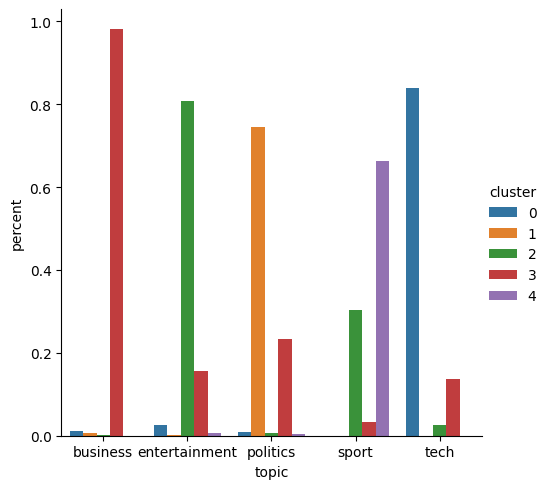

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of items in each cluster for each topic
df_grouped = df.groupby(["topic", "cluster"])["cluster"].count().reset_index(name="count")

# Compute the total number of items for each topic
df_topic_totals = df_grouped.groupby("topic")["count"].sum().reset_index(name="total")

# Merge the count and total dataframes
df_merged = pd.merge(df_grouped, df_topic_totals, on="topic")

# Compute the percent of each cluster for each topic
df_merged["percent"] = df_merged["count"] / df_merged["total"]

# Create the stacked bar chart
sns.catplot(x="topic", y="percent", hue="cluster", kind="bar", data=df_merged)

# Show the chart
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['summary'], test_size=0.2, random_state=42)

# Vectorize the articles using TF-IDF
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Train a linear SVM model
clf = LinearSVC()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
print(classification_report(y_test, y_pred))

Accuracy: 11.24%


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_cla

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv("preprocessed_df.csv", encoding = "ISO-8859-1")

# Define the feature extraction and model training pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), # Extract features using tf-idf
    ('svd', TruncatedSVD()), # Reduce dimensionality of features
    ('lr', LogisticRegression()) # Train the model using Logistic Regression
])

# Fit the pipeline to the data
pipeline.fit(data['article'], data['summary'])

# Test the model
test_article = "Rocker Doherty gets into an onstage fight with his band Babyshambles"
predicted_summary = pipeline.predict([test_article])
print(predicted_summary)
# Output: "Babyshambles formed acrimoniously after Doherty's departure from the Libertines"

["['viotti', 'director', 'la', 'fenice', 'since', '2002', 'conducted', 'renowned', 'opera', 'house', 'worldwide', 'including', 'milan', 'la', 'scala', 'vienna', 'state', 'operathe', 'last', 'opera', 'directed', 'la', 'fenice', 'massenet', 'le', 'roi', 'de', 'lahoreat', 'la', 'fenice', 'viotti', 'widely', 'acclaimed', 'production', 'french', 'composer', 'massenet', 'thai', 'production', 'included', 'giuseppe', 'verdi', 'la', 'traviata', 'richard', 'strauss', 'ariadne', 'auf', 'naxosconductor', 'marcello', 'viotti', 'director', 'venice', 'famous', 'la', 'fenice', 'theatre', 'died', 'germany', '50viottis', 'debut', 'new', 'york', 'metropolitan', 'opera', 'came', '2000', 'giacomo', 'puccini', 'madame', 'butterfly', 'followed', 'la', 'boheme', 'la', 'traviata', 'fromental', 'halevy', 'la', 'juivehis', 'time', 'la', 'fenice', 'coincided', 'reopening', '2003', 'destroyed', 'fire', '1996']"]
